In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

from matplotlib.patches import Ellipse
import matplotlib.pyplot as plt
import matplotlib.transforms as transforms

In [ ]:
df = pd.read_excel('../GC_MS_data/hemp-gcms-selected4-transpose.xlsx')
df

,Type1,Clionasterol,Linoleic acid (omega-6),"Linoleic acid, ethyl ester","Oleic acid, ethyl ester"
0,1,15.35,20.09,0.00,0.00
1,1,0.00,22.93,0.00,0.00
2,1,0.00,35.13,10.36,0.00
3,1,0.00,86.53,0.00,0.00
4,1,0.00,66.24,0.00,0.00
5,1,0.00,34.08,20.61,13.02
6,2,29.07,0.00,0.00,0.00
7,2,0.00,17.63,0.00,0.00
8,2,0.00,15.04,11.49,10.72
9,2,22.32,0.00,0.00,0.00


In [4]:
column_name = df.columns
column_name

Index(['Type1', 'Clionasterol', 'Linoleic acid (omega-6)',
       'Linoleic acid, ethyl ester', 'Oleic acid, ethyl ester'],
      dtype='object')

In [5]:
df_type=df['Type1']
df_type

0     1
1     1
2     1
3     1
4     1
5     1
6     2
7     2
8     2
9     2
10    2
11    2
Name: Type1, dtype: int64

In [6]:
df_features = df.drop('Type1', axis=1)
df_features

,Clionasterol,Linoleic acid (omega-6),"Linoleic acid, ethyl ester","Oleic acid, ethyl ester"
0,15.35,20.09,0.00,0.00
1,0.00,22.93,0.00,0.00
2,0.00,35.13,10.36,0.00
3,0.00,86.53,0.00,0.00
4,0.00,66.24,0.00,0.00
5,0.00,34.08,20.61,13.02
6,29.07,0.00,0.00,0.00
7,0.00,17.63,0.00,0.00
8,0.00,15.04,11.49,10.72
9,22.32,0.00,0.00,0.00


In [7]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_features)
scaled_data

array([[ 0.85863422, -0.17874035, -0.54070047, -0.44471607],
       [-0.6615544 , -0.07109817, -0.54070047, -0.44471607],
       [-0.6615544 ,  0.3913084 ,  1.04243383, -0.44471607],
       [-0.6615544 ,  2.33948031, -0.54070047, -0.44471607],
       [-0.6615544 ,  1.57044514, -0.54070047, -0.44471607],
       [-0.6615544 ,  0.35151111,  2.6087588 ,  2.48209262],
       [ 2.21739565, -0.9401951 , -0.54070047, -0.44471607],
       [-0.6615544 , -0.27197971, -0.54070047, -0.44471607],
       [-0.6615544 , -0.37014635,  1.21511161,  1.96506804],
       [ 1.5489088 , -0.9401951 , -0.54070047, -0.44471607],
       [ 0.6674965 , -0.9401951 , -0.54070047, -0.44471607],
       [-0.6615544 , -0.9401951 , -0.54070047, -0.44471607]])

In [8]:
label_encoder = LabelEncoder()
hemp_type_encoded = label_encoder.fit_transform(df_type)
hemp_type_encoded

array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [12]:
pls = PLSRegression(n_components=2)

kf = KFold(n_splits=5, shuffle=True, random_state=42)
SSE = 0
SSO = 0

for train_index, test_index in kf.split(scaled_data):
    X_train, X_test = scaled_data[train_index], scaled_data[test_index]
    Y_train, Y_test = hemp_type_encoded[train_index], hemp_type_encoded[test_index]
    
    
    pls.fit(X_train, Y_train)
    
    
    Y_pred = pls.predict(X_test)
    
    
    SSE += np.sum((Y_test - Y_pred) ** 2)
    SSO += np.sum((Y_test - np.mean(Y_train)) ** 2)

In [13]:
pls_da = PLSRegression(n_components=2)
X_scores, Y_scores = pls_da.fit_transform(scaled_data, hemp_type_encoded)

pls_da_scores = X_scores


pls_da_loadings = pls_da.x_weights_

print("PLS-DA Component Loadings:")
print(pls_da_loadings)


feature_importance = np.sum(np.square(pls_da_loadings), axis=0)
print("Sum of Squared Loadings (Feature Importance) for Each Component:")
print(feature_importance)

PLS-DA Component Loadings:
[[-0.46562904 -0.53775918]
 [ 0.83707871 -0.41667421]
 [ 0.28297222  0.22665072]
 [ 0.04914825  0.697013  ]]
Sum of Squared Loadings (Feature Importance) for Each Component:
[1. 1.]


In [14]:
pls_da_df = pd.DataFrame(data=pls_da_scores, columns=['PLS1', 'PLS2'])
pls_da_df['Hemp type'] = df_type
pls_da_df

,PLS1,PLS2,Hemp type
0,-0.693450,-0.554654,1
1,0.070528,-0.068550,1
2,0.870031,-0.174919,1
3,2.002466,-1.671633,1
4,1.386129,-1.160209,1
5,1.400216,1.958001,1
6,-1.909456,-0.546739,2
7,-0.090467,0.065040,2
8,0.419946,1.923898,2
9,-1.611440,-0.301502,2


In [18]:
# Calculate Q2
Q2 = 1 - (SSE / SSO)
print(f"Q^2 value: {Q2:.4f}")

Q^2 value: 0.3090


In [19]:
# Predict using the PLS model
y_pred = pls_da.predict(scaled_data)

In [20]:
from sklearn.metrics import r2_score

# Calculate R^2
r2 = r2_score(hemp_type_encoded, y_pred)
print(f"R^2: {r2:.4f}")

R^2: 0.5583


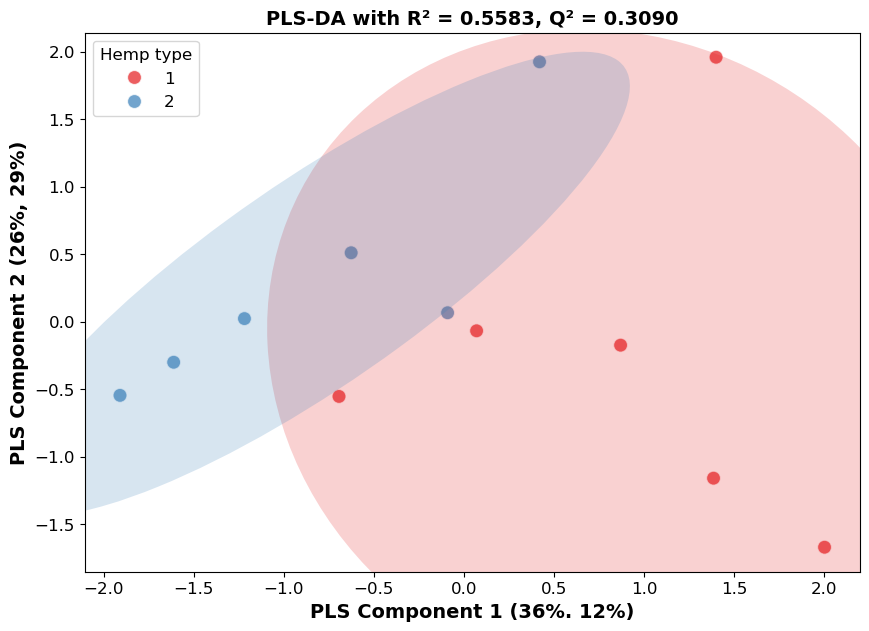

In [21]:
def confidence_ellipse(x, y, ax, n_std=2, facecolor='none', **kwargs):
    if x.size != y.size:
        raise ValueError("x and y must be the same size")

    cov = np.cov(x, y)
    mean = np.mean(x), np.mean(y)

    pearson = cov[0, 1] / np.sqrt(cov[0, 0] * cov[1, 1])
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0),
                      width=ell_radius_x * 1.95,
                      height=ell_radius_y * 1.95,
                      facecolor=facecolor, alpha=0.2,
                      **kwargs)

    scale_x = np.sqrt(cov[0, 0]) * n_std
    scale_y = np.sqrt(cov[1, 1]) * n_std
    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean[0], mean[1])

    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)


plt.figure(figsize=(10, 7))
axis = plt.gca()  # Get the current axis for adding ellipses


colors = sns.color_palette("Set1", len(df['Type1'].unique()))


sns.scatterplot(data=pls_da_df, x='PLS1', y='PLS2', hue='Hemp type', palette=colors, alpha=0.7, s=100)


labels = pls_da_df['Hemp type'].unique()
for i, label in enumerate(labels):
    color = colors[i]
    confidence_ellipse(pls_da_df[pls_da_df['Hemp type'] == label]['PLS1'],
                       pls_da_df[pls_da_df['Hemp type'] == label]['PLS2'],
                       axis, edgecolor=color, linewidth=0, facecolor=color)
    

plt.title(f'PLS-DA with R² = {r2:.4f}, Q² = {Q2:.4f}',fontsize=14, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('PLS Component 1 (36%. 12%)',fontsize=14, fontweight='bold')
plt.ylabel('PLS Component 2 (26%, 29%)',fontsize=14, fontweight='bold')
plt.grid(False)
plt.legend(title='Hemp type', fontsize=12, title_fontsize=12)
#plt.savefig('clustermap10p-pca2-pls-da.png', dpi=300, bbox_inches='tight')
plt.show()

In [22]:
X_var_explained = np.var(pls_da.x_scores_, axis=0) / np.sum(np.var(scaled_data, axis=0))
Y_var_explained = np.var(pls_da.y_scores_, axis=0) / np.sum(np.var(hemp_type_encoded, axis=0))

print(f"Variance Explained in X by each component: {X_var_explained}")
print(f"Variance Explained in Y by each component: {Y_var_explained}")

cumulative_X_var_explained = np.cumsum(X_var_explained)
cumulative_Y_var_explained = np.cumsum(Y_var_explained)

print(f"Cumulative Variance Explained in X: {cumulative_X_var_explained}")
print(f"Cumulative Variance Explained in Y: {cumulative_Y_var_explained}")

Variance Explained in X by each component: [0.36330328 0.26401187]
Variance Explained in Y by each component: [11.99121985 29.59964231]
Cumulative Variance Explained in X: [0.36330328 0.62731516]
Cumulative Variance Explained in Y: [11.99121985 41.59086215]


In [23]:
X_loadings = pls_da.x_loadings_
Y_loadings = pls_da.y_loadings_

X_loadings_df = pd.DataFrame(X_loadings, columns=[f'PLS_Component_{i+1}' for i in range(pls_da.n_components)], index=df.columns[1:])
Y_loadings_df = pd.DataFrame(Y_loadings, columns=[f'PLS_Component_{i+1}' for i in range(pls_da.n_components)], index=['Type1'])

print("X Loadings:")
print(X_loadings_df)
print("\nY Loadings:")
print(Y_loadings_df)

X Loadings:
                            PLS_Component_1  PLS_Component_2
Clionasterol                      -0.644169        -0.230781
Linoleic acid (omega-6)            0.698740        -0.411056
Linoleic acid, ethyl ester         0.358222         0.700188
Oleic acid, ethyl ester            0.280562         0.783229

Y Loadings:
       PLS_Component_1  PLS_Component_2
Type1        -0.552973         0.252637


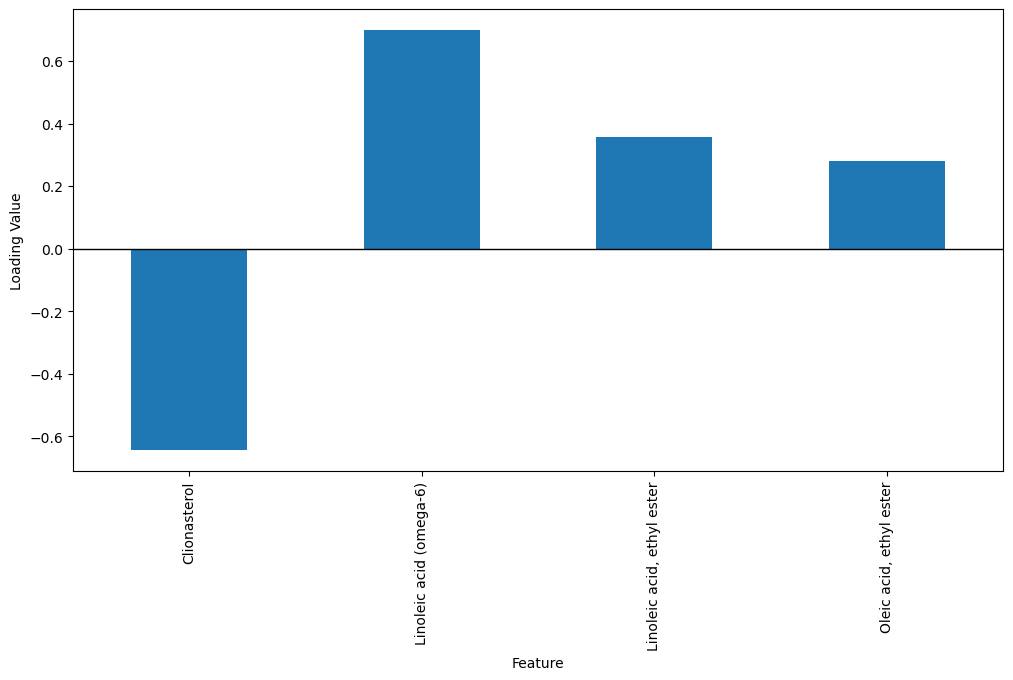

In [24]:
plt.figure(figsize=(12, 6))
X_loadings_df['PLS_Component_1'].plot(kind='bar')
plt.xlabel('Feature')
plt.ylabel('Loading Value')
plt.axhline(y=0, color='black', linestyle='-', linewidth=1)
plt.grid(False)
#plt.savefig('clustermap10p-pca2-pls-da-loading-PLS1.png', dpi=300, bbox_inches='tight')
plt.show()

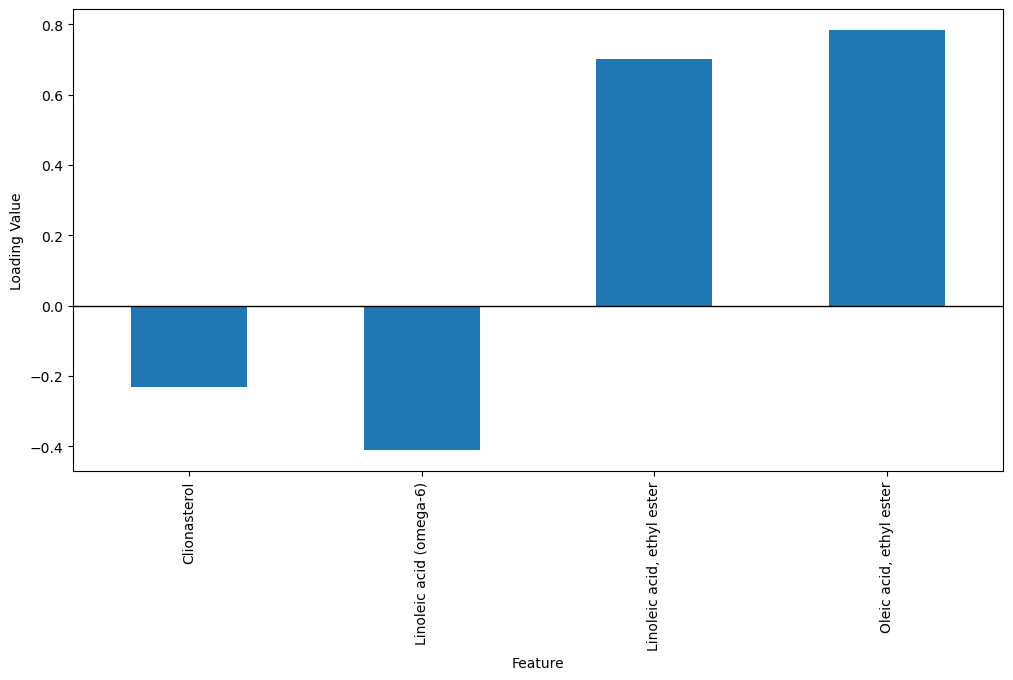

In [25]:
plt.figure(figsize=(12, 6))
X_loadings_df['PLS_Component_2'].plot(kind='bar')
plt.xlabel('Feature')
plt.ylabel('Loading Value')
plt.axhline(y=0, color='black', linestyle='-', linewidth=1)
plt.grid(False)
#plt.savefig('clustermap10p-pca2-pls-da-loading-PLS2.png', dpi=300, bbox_inches='tight')
plt.show()